<center>
<img src="https://raw.githubusercontent.com/yoonkt200/python-data-analysis/master/img/this_is_data_anal.png" width="200" height="200"><br>
</center>

# ch03. 미래를 예측하는 데이터 분석


## 3.1 프로야구 선수의 다음 해 연봉 예측하기



예제에 들어가기 앞서 예측 분석의 가장 대표적인 방법인 회귀 분석을 살펴보자. 

### step.1 탐색: 프로야구 연봉 데이터 살펴보기


예제에서 사용할 연봉 데이터셋의 기본 정보를 살펴보자. 데이터의 기초 탐색결과는 다음과 같다. 프로야구 연봉 데이터셋은 총 152개이며, 22개 피처로 구성되어 있다. 이 22개의 피처는 선수가 가지고 있는 기록들에 대한 세부 정보를 나타낸다.

데이터 출처 : https://www.statiz.co.kr

- 프로야구 연봉 데이터셋의 기본 정보 구하기

In [1]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
picher_file_path = '/home/jaeyoon89/python-data-analysis/data/picher_stats_2017.csv'
batter_file_path = '/home/jaeyoon89/python-data-analysis/data/picher_stats_2017.csv'
picher = pd.read_csv(picher_file_path)
batter = pd.read_csv(batter_file_path)

picher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [4]:
picher.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [5]:
print(picher.shape)

(152, 22)


이번 예제에서 예측할 회귀 분석 목표는 데이터의 연봉 피처이다. 다음 코드는 이를 히스토그램과 상자 그림으로 시각화한 것이다.

- 예측할 대상인 '연봉'에 대한 정보

In [6]:
picher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

<AxesSubplot:>

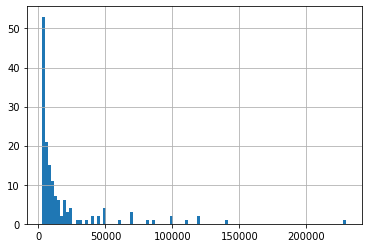

In [7]:
picher['연봉(2018)'].hist(bins=100) # 2018년 연봉 분포를 출력한다.

<AxesSubplot:>

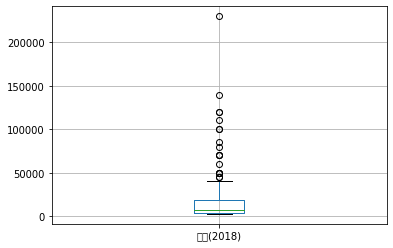

In [8]:
picher.boxplot(column=['연봉(2018)']) # 연봉의 상자 그림을 출력한다.

히스토그램에서는 연봉의 분포를 파악할 수 있으며, 상자 그림에서는 연봉의 일반적인 범주를 파악할 수 있다.